In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

import tensorflow as tf

import cv2
import os

import numpy as np
import pandas as pd

In [2]:
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 
          'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 
          'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']
img_size = 200
def get_data(data_dir):
    x_training = []
    y_training = []
    x_testing = []
    y_testing = []
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        X = []
        Y = []
        for img in os.listdir(path):
            try:
                images = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized = cv2.resize(images, (img_size, img_size)) # Reshaping images to preferred size
                X.append(resized)
                Y.append(class_num)
            except Exception as e:
                print(e)
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 5)
        x_training.extend(X_train)
        y_training.extend(Y_train)
        x_testing.extend(X_test)
        y_testing.extend(Y_test)
    return x_training, y_training, x_testing, y_testing

In [3]:
x_train, y_train, x_test, y_test = get_data('/Users/Aoba/Documents/DS4400/finalProject/Detective_ASL/data/asl_alphabet_train/')

Text(0.5, 1.0, 'A')

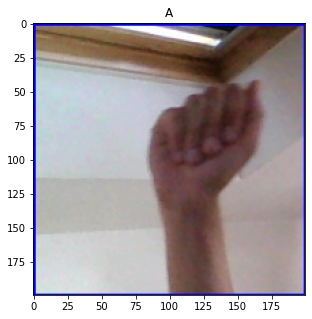

In [4]:
plt.figure(figsize = (5,5))
plt.imshow(x_train[0])
plt.title(labels[y_train[0]])

Text(0.5, 1.0, 'R')

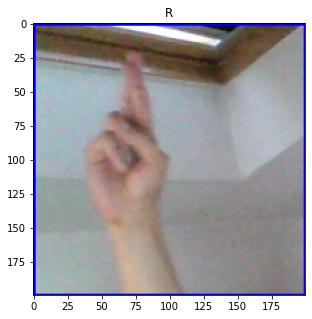

In [5]:
plt.figure(figsize = (5,5))
plt.imshow(x_train[40000])
plt.title(labels[y_train[40000]])

In [6]:
testlist = []
for i in range(len(y_test)):
    testlist.append(labels[y_test[i]])

In [28]:
import plotly.express as px
tlist = pd.DataFrame(testlist)
count = tlist.count()
graph = px.bar(tlist, orientation='h', height=500, width=500);
graph.update_layout(
    title='Distribution of testing data',
    xaxis_title="Count",
    yaxis_title="ASL Letters and Symbols",
)

In [7]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [8]:
x_test = np.array(x_test)
y_test = np.array(y_test)

In [9]:
# Normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

KeyboardInterrupt: 

In [ ]:
x_train /= 255
x_test /= 255

In [ ]:
x_train.reshape(-1, img_size, img_size, 1)
x_test.reshape(-1, img_size, img_size, 1)

In [ ]:
# Data Augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

In [ ]:
# Define the Model Here 